# Data Visualization

In [1]:
#import libries
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/all_movies_rated_only_cleaned_02.csv')

In [3]:
df.head()

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actors,Actor_1,Actor_2,Actor_3,Actor_4,Description_length,Description_word_count,labels
0,Comedy,Beef,(2023– ),TV-MA,8.2,Two people let a road rage incident burrow int...,"['Steven Yeun', 'Ali Wong', 'Joseph Lee', 'You...",Steven Yeun,Ali Wong,Joseph Lee,Young Mazino,110,19,1
1,Comedy,Succession,(2018–2023),TV-MA,8.8,The Roy family is known for controlling the bi...,"['Nicholas Braun', 'Brian Cox', 'Kieran Culkin...",Nicholas Braun,Brian Cox,Kieran Culkin,Peter Friedman,173,28,1
2,Comedy,The Super Mario Bros. Movie,(2023),PG,7.3,The story of The Super Mario Bros. on their jo...,"['Chris Pratt', 'Anya Taylor-Joy', 'Charlie Da...",Chris Pratt,Anya Taylor-Joy,Charlie Day,Jack Black,81,14,1
3,Comedy,Ted Lasso,(2020– ),TV-MA,8.8,American college football coach Ted Lasso head...,"['Jason Sudeikis', 'Brett Goldstein', 'Hannah ...",Jason Sudeikis,Brett Goldstein,Hannah Waddingham,Brendan Hunt,132,20,1
4,Comedy,Ghosted,(2023),13+,5.8,Cole falls head over heels for enigmatic Sadie...,"['Chris Evans', 'Ana de Armas', 'Adrien Brody'...",Chris Evans,Ana de Armas,Adrien Brody,Mike Moh,232,41,0


In [4]:
df.shape

(190248, 14)

In [5]:
df.dtypes

Genre                      object
Title                      object
Year_produced              object
Certificate                object
Ratings                   float64
Description                object
Actors                     object
Actor_1                    object
Actor_2                    object
Actor_3                    object
Actor_4                    object
Description_length          int64
Description_word_count      int64
labels                      int64
dtype: object

## Histogram: Plot of Ratings

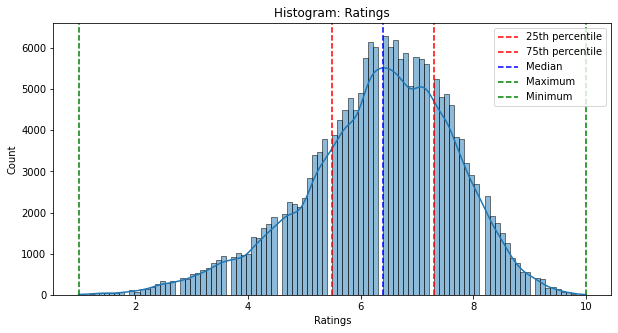

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Histogram: Ratings')
sns.histplot(x = df['Ratings'], kde = True, bins = 100)

# calculate the interquartile range
q1 = np.percentile(df['Ratings'], 25)
q3 = np.percentile(df['Ratings'], 75)
iqr = q3 - q1

ax.axvline(q1, color='red', linestyle='--', label='25th percentile')
ax.axvline(q3, color='red', linestyle='--', label='75th percentile')

# calculate median, maximum, and minimum values
median = np.median(df['Ratings'])
maximum = np.max(df['Ratings'])
minimum = np.min(df['Ratings'])

ax.axvline(median, color='b', linestyle='--', label='Median')
ax.axvline(maximum, color='g', linestyle='--', label='Maximum')
ax.axvline(minimum, color='g', linestyle='--', label='Minimum')

plt.legend()

Observations:
1. This is interesting as generally, one would think that most movies have a median rating of 5. Turns out that it is observed that the median of movie ratings are located at 6.
2. This means that movies below 6 are not classified as 'good' movies according to movie reviewers.

## Countplot: Count of Movie Genres

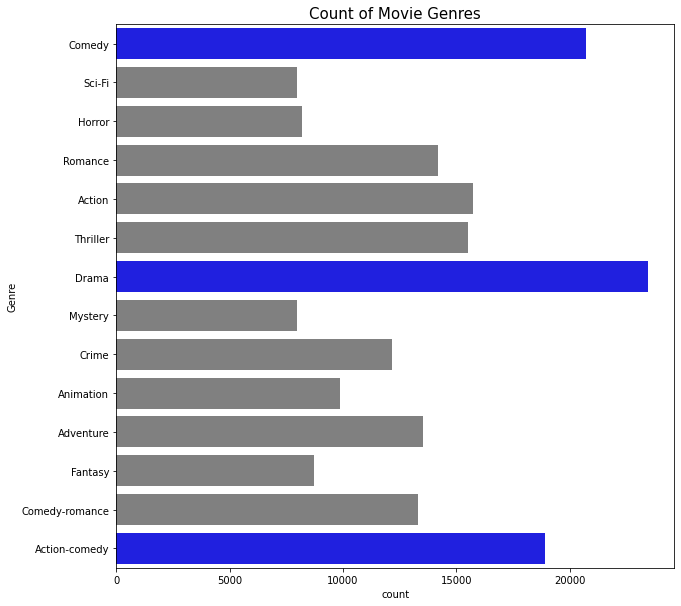

In [7]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(y=df['Genre'])

# Get the top three categories
top_three = df['Genre'].value_counts().nlargest(3).index
# Set different colors for the top three categories
colors = ['blue' if x in top_three else 'gray' for x in df['Genre'].unique()]

# Plot the count with different colors
sns.countplot(y=df['Genre'], palette=colors)

plt.title('Count of Movie Genres', fontsize=15)
plt.show()


Observations
1. This count plot shows that the top 3 movie genres are Comedy, Drama and Action-comedy.
2. This shows that high number of film maker chose to produce their movie in the a/m genres. This also can be translated as high amount of audience tends towards the a/m movie genres.
3. For aspiring movie directors, this means that if they produce a movie in these 3 genres, it would target a wide audience. 

## Count plot: Count of Movie Certificates

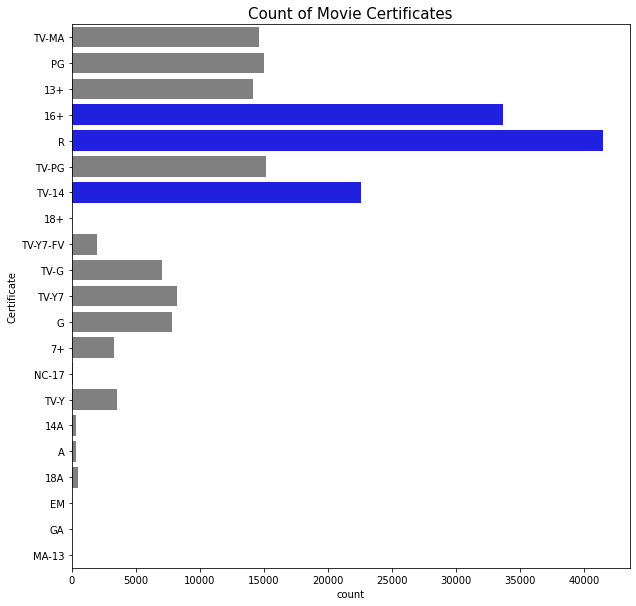

In [8]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(y=df['Certificate'])

# Get the top three categories
top_three = df['Certificate'].value_counts().nlargest(3).index
# Set different colors for the top three categories
colors = ['blue' if x in top_three else 'gray' for x in df['Certificate'].unique()]

# Plot the count with different colors
sns.countplot(y=df['Certificate'], palette=colors)

plt.title('Count of Movie Certificates', fontsize=15)
plt.show()


Observations:
1. It is observed that movies rated 16+, R and TV-14 are most popular.
2. Hence, movie directors can consider producing a movie rated in the a/m genres so as to hit a wide range of audience.

In [9]:
top10 = df['Actor_1'].value_counts().head(10)
top10.head()

Mel Blanc         548
Masako Nozawa     422
Junko Takeuchi    384
Jackie Chan       351
Jeff Bennett      318
Name: Actor_1, dtype: int64

In [10]:
top = pd.DataFrame(top10)

In [11]:
top.head()

,Actor_1
Mel Blanc,548
Masako Nozawa,422
Junko Takeuchi,384
Jackie Chan,351
Jeff Bennett,318


## Bar plot: Top Actors of All Time

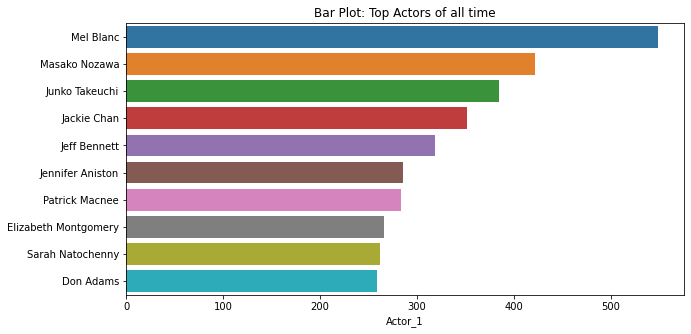

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x = top['Actor_1'], y = top.index)
plt.xticks(rotation=0);

plt.title("Bar Plot: Top Actors of all time")
plt.show()

Observations:
1. From the bar plot, these are the top actors that are starred in most movies.
2. Movie directors can consider these actors as it is proof that they are starred in most movies.
3. It is noteworthy to do further investigations such as checking on these actors background as they might have retired from the industry.

## Analysing Data From Top Movie Certificate Ratings

In [13]:
df['Certificate'].value_counts().nlargest(3)

R        41497
16+      33722
TV-14    22585
Name: Certificate, dtype: int64

In [14]:
R_rating = df[df['Certificate'] == 'R']

In [15]:
R_rating.head()

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actors,Actor_1,Actor_2,Actor_3,Actor_4,Description_length,Description_word_count,labels
6,Comedy,Beau Is Afraid,(2023),R,7.2,"Following the sudden death of his mother, a mi...","['Joaquin Phoenix', 'Patti LuPone', 'Amy Ryan'...",Joaquin Phoenix,Patti LuPone,Amy Ryan,Nathan Lane,164,26,1
9,Comedy,Renfield,(2023),R,6.7,"Renfield, Dracula's henchman and inmate at the...","['Nicholas Hoult', 'Nicolas Cage', 'Awkwafina'...",Nicholas Hoult,Nicolas Cage,Awkwafina,Ben Schwartz,180,31,1
12,Comedy,Cocaine Bear,(2023),R,6.0,"An oddball group of cops, criminals, tourists ...","['Keri Russell', 'Alden Ehrenreich', ""O'Shea J...",Keri Russell,Alden Ehrenreich,O'Shea Jackson Jr.,Ray Liotta,177,28,0
19,Comedy,Operation Fortune: Ruse de guerre,(2023),R,6.3,Special agent Orson Fortune and his team of op...,"['Jason Statham', 'Aubrey Plaza', 'Cary Elwes'...",Jason Statham,Aubrey Plaza,Cary Elwes,Hugh Grant,226,38,0
20,Comedy,Everything Everywhere All at Once,(2022),R,7.9,A middle-aged Chinese immigrant is swept up in...,"['Michelle Yeoh', 'Stephanie Hsu', 'Jamie Lee ...",Michelle Yeoh,Stephanie Hsu,Jamie Lee Curtis,Ke Huy Quan,185,31,1


### Histogram: R-ratings

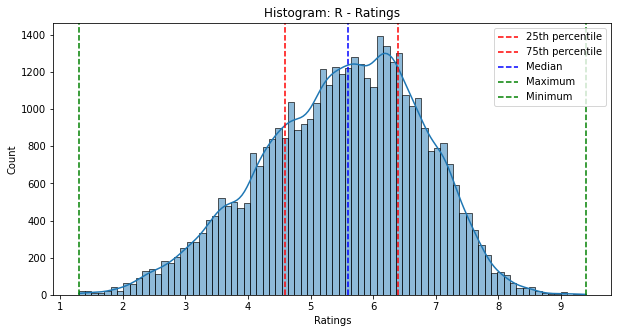

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Histogram: R - Ratings')
sns.histplot(x = R_rating ['Ratings'], kde = True, bins = 80)

# calculate the interquartile range
q1 = np.percentile(R_rating ['Ratings'], 25)
q3 = np.percentile(R_rating ['Ratings'], 75)
iqr = q3 - q1

ax.axvline(q1, color='red', linestyle='--', label='25th percentile')
ax.axvline(q3, color='red', linestyle='--', label='75th percentile')

# calculate median, maximum, and minimum values
median = np.median(R_rating ['Ratings'])
maximum = np.max(R_rating ['Ratings'])
minimum = np.min(R_rating ['Ratings'])

ax.axvline(median, color='b', linestyle='--', label='Median')
ax.axvline(maximum, color='g', linestyle='--', label='Maximum')
ax.axvline(minimum, color='g', linestyle='--', label='Minimum')

plt.legend()

Observations:
1. It seems that the median for R-ratings are rated at 5.7.

### Histogram: 16+

In [17]:
rating_16 = df[df['Certificate'] == '16+']

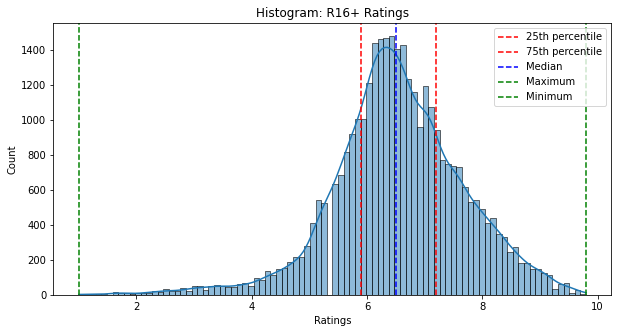

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Histogram: R16+ Ratings')
sns.histplot(x = rating_16['Ratings'], kde = True, bins = 90)

# calculate the interquartile range
q1 = np.percentile(rating_16['Ratings'], 25)
q3 = np.percentile(rating_16['Ratings'], 75)
iqr = q3 - q1

ax.axvline(q1, color='red', linestyle='--', label='25th percentile')
ax.axvline(q3, color='red', linestyle='--', label='75th percentile')

# calculate median, maximum, and minimum values
median = np.median(rating_16['Ratings'])
maximum = np.max(rating_16['Ratings'])
minimum = np.min(rating_16['Ratings'])

ax.axvline(median, color='b', linestyle='--', label='Median')
ax.axvline(maximum, color='g', linestyle='--', label='Maximum')
ax.axvline(minimum, color='g', linestyle='--', label='Minimum')

plt.legend()

Observations:
1. It is observed that the median for 16+ rating is >6.

### Histogram: TV-14

In [19]:
TV14_rating = df[df['Certificate'] == 'TV-14']

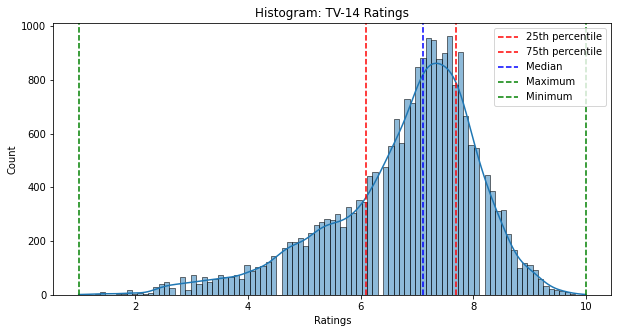

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Histogram: TV-14 Ratings')
sns.histplot(x = TV14_rating['Ratings'], kde = True, bins = 95)

# calculate the interquartile range
q1 = np.percentile(TV14_rating['Ratings'], 25)
q3 = np.percentile(TV14_rating['Ratings'], 75)
iqr = q3 - q1

ax.axvline(q1, color='red', linestyle='--', label='25th percentile')
ax.axvline(q3, color='red', linestyle='--', label='75th percentile')

# calculate median, maximum, and minimum values
median = np.median(TV14_rating['Ratings'])
maximum = np.max(TV14_rating['Ratings'])
minimum = np.min(TV14_rating['Ratings'])

ax.axvline(median, color='b', linestyle='--', label='Median')
ax.axvline(maximum, color='g', linestyle='--', label='Maximum')
ax.axvline(minimum, color='g', linestyle='--', label='Minimum')

plt.legend()

Observations:
1. It is observed that the median for TV-14 rating is >6.

## Checking Description Length

The next lines of code is to check the length of each description.

In [21]:
df[df['Description'].isnull()].head()

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actors,Actor_1,Actor_2,Actor_3,Actor_4,Description_length,Description_word_count,labels


In [22]:
df['Description'].fillna('-', inplace=True)

In [23]:
df[df['Description'] == '-'].head()

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actors,Actor_1,Actor_2,Actor_3,Actor_4,Description_length,Description_word_count,labels
81305,Thriller,Tropix,(2004),R,3.5,-,"['Thomas Scott Stanton', 'Danielle Bisutti', '...",Thomas Scott Stanton,Danielle Bisutti,Keith Brunsmann,Michelle Jones,1,1,0
124014,Crime,Tropix,(2004),R,3.5,-,"['Thomas Scott Stanton', 'Danielle Bisutti', '...",Thomas Scott Stanton,Danielle Bisutti,Keith Brunsmann,Michelle Jones,1,1,0
146357,Adventure,Tropix,(2004),R,3.5,-,"['Thomas Scott Stanton', 'Danielle Bisutti', '...",Thomas Scott Stanton,Danielle Bisutti,Keith Brunsmann,Michelle Jones,1,1,0


In [24]:
df['Description_length'] = df['Description'].map(lambda x: len(x))

In [25]:
df['Description_word_count'] = df['Description'].map(lambda x:len(x.split()))

In [26]:
df.head(1)

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actors,Actor_1,Actor_2,Actor_3,Actor_4,Description_length,Description_word_count,labels
0,Comedy,Beef,(2023– ),TV-MA,8.2,Two people let a road rage incident burrow int...,"['Steven Yeun', 'Ali Wong', 'Joseph Lee', 'You...",Steven Yeun,Ali Wong,Joseph Lee,Young Mazino,110,19,1


### Distribution of Word Count

<Figure size 720x432 with 0 Axes>

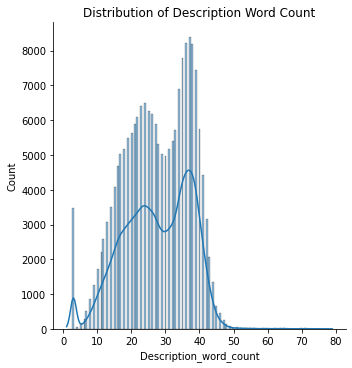

In [39]:
# Set the figure size
plt.figure(figsize=(10, 6))
sns.displot(df['Description_word_count'], kde = True)
plt.title('Distribution of Description Word Count')
plt.show()

### Distribution of Description Length

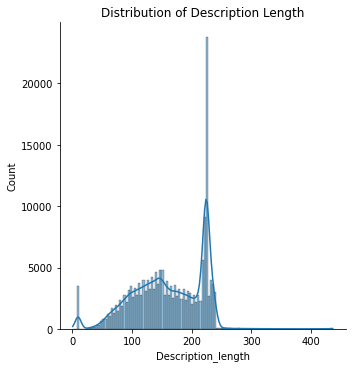

In [28]:
sns.displot(df['Description_length'], kde = True)
plt.title('Distribution of Description Length')
plt.show()

Things to note:
1. Description length refers to the total number of characters or tokens in a text
2. description word count focuses on the number of words

Observation:

1. In description length graph, it shows the total number of charavters in a text. It is observed that there is a high count of words when the description length is approx 250.
2. In distribution of word count, it shows that there are two spikes in word count. This means that most movie word count description are 20 words or 40 words. 

## Feature Engineering: Good/Bad labels 

In [29]:
df.describe()

,Ratings,Description_length,Description_word_count,labels
count,190248.000000,190248.000000,190248.000000,190248.000000
mean,6.330813,161.290158,27.526518,0.532915
std,1.343091,57.695582,9.893043,0.498917
min,1.000000,1.000000,1.000000,0.000000
25%,5.500000,118.000000,20.000000,0.000000
50%,6.400000,163.000000,28.000000,1.000000
75%,7.300000,220.000000,36.000000,1.000000
max,10.000000,436.000000,79.000000,1.000000


This shows that the median of ratings are 6.3. Any ratings above 6.3 will be classified as 'Good' whereas any ratings belov 6.3 will be classified as 'Bad'.

In [30]:
df.head(1)

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actors,Actor_1,Actor_2,Actor_3,Actor_4,Description_length,Description_word_count,labels
0,Comedy,Beef,(2023– ),TV-MA,8.2,Two people let a road rage incident burrow int...,"['Steven Yeun', 'Ali Wong', 'Joseph Lee', 'You...",Steven Yeun,Ali Wong,Joseph Lee,Young Mazino,110,19,1


1 = good, 0=bad

In [31]:
df['labels']= df['Ratings'].apply(lambda x: 1 if x>6.330813	else 0)

In [32]:
df.head(1)

,Genre,Title,Year_produced,Certificate,Ratings,Description,Actors,Actor_1,Actor_2,Actor_3,Actor_4,Description_length,Description_word_count,labels
0,Comedy,Beef,(2023– ),TV-MA,8.2,Two people let a road rage incident burrow int...,"['Steven Yeun', 'Ali Wong', 'Joseph Lee', 'You...",Steven Yeun,Ali Wong,Joseph Lee,Young Mazino,110,19,1


In [33]:
df.to_csv('./datasets/all_movies_rated_only_cleaned_02.csv', index=False)